In [76]:
from upsetplot import UpSet, plot, from_contents
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os
os.chdir("/mnt/BioAdHoc/Groups/vd-ay/kfetter/2024_rex/")

#### Data Load

In [19]:
cd4n = pd.read_excel("summarize_results/sea_atac_CD4N.xlsx", sheet_name = "long.bkgd_short")
cd8n = pd.read_excel("summarize_results/sea_atac_CD8N.xlsx", sheet_name = "long.bkgd_short")
nk = pd.read_excel("summarize_results/sea_atac_NK.xlsx", sheet_name = "long.bkgd_short")
nb = pd.read_excel("summarize_results/sea_atac_NB.xlsx", sheet_name = "long.bkgd_short")
mono = pd.read_excel("summarize_results/sea_atac_Mono.xlsx", sheet_name = "long.bkgd_short")

In [20]:
mono

,RANK,ALT_ID,TP,TP%,FP,FP%,ENR_RATIO,EVALUE,QVALUE
0,1,SPIC,1816,22.77,1682,16.61,1.37,3.080000e-14,1.630000e-14
1,2,SPI1,2988,37.47,2977,29.40,1.27,2.820000e-13,7.460000e-14
2,3,CEBPB,2612,32.75,2585,25.53,1.28,2.950000e-12,5.220000e-13
3,4,CEBPD,2151,26.97,2091,20.65,1.31,1.110000e-11,1.470000e-12
4,5,CEBPA,1947,24.41,1880,18.56,1.32,4.220000e-11,4.480000e-12
...,...,...,...,...,...,...,...,...,...
271,272,ETV5::FOXO1,784,9.83,860,8.49,1.16,8.590000e+00,1.670000e-02
272,273,HOXB7,434,5.44,457,4.51,1.21,8.610000e+00,1.670000e-02
273,274,ETV6,3045,38.18,3536,34.92,1.09,8.730000e+00,1.690000e-02
274,275,CDX4,318,3.99,326,3.22,1.24,8.830000e+00,1.700000e-02


#### Data Organization

In [51]:
cd4n["Cell_Type"] = "CD4 Naive"
cd8n["Cell_Type"] = "CD8 Naive"
nb["Cell_Type"] = "Naive B"
nk["Cell_Type"] = "Natural Killer"
mono["Cell_Type"] = "Monocyte"

cd4n = cd4n[cd4n["RANK"] <= 40]
cd8n = cd8n[cd8n["RANK"] <= 40]
nb = nb[nb["RANK"] <= 40]
nk = nk[nk["RANK"] <= 40]
mono = mono[mono["RANK"] <= 40]

In [22]:
df = pd.concat([cd4n, cd8n, nb, nk, mono])

In [23]:
df

,RANK,ALT_ID,TP,TP%,FP,FP%,ENR_RATIO,EVALUE,QVALUE,Cell_Type
0,1,ZNF93,575,7.41,96,2.92,2.52,1.150000e-08,1.040000e-08,CD4 Naive
1,2,YY2,278,3.58,34,1.03,3.38,3.400000e-07,1.540000e-07,CD4 Naive
2,3,ZNF610,540,6.96,101,3.07,2.25,1.150000e-05,3.480000e-06,CD4 Naive
3,4,ZBED2,436,5.62,79,2.40,2.32,7.670000e-05,1.740000e-05,CD4 Naive
4,5,JUN::JUNB,313,4.03,55,1.67,2.38,1.840000e-03,3.340000e-04,CD4 Naive
...,...,...,...,...,...,...,...,...,...,...
271,272,ETV5::FOXO1,784,9.83,860,8.49,1.16,8.590000e+00,1.670000e-02,Monocyte
272,273,HOXB7,434,5.44,457,4.51,1.21,8.610000e+00,1.670000e-02,Monocyte
273,274,ETV6,3045,38.18,3536,34.92,1.09,8.730000e+00,1.690000e-02,Monocyte
274,275,CDX4,318,3.99,326,3.22,1.24,8.830000e+00,1.700000e-02,Monocyte


In [49]:
df = df.loc[df["EVALUE"] < 1]

In [57]:
data = from_contents(
    {"CD4 Naive": list(set(list(cd4n["ALT_ID"]))), 
     "CD8 Naive": list(set(list(cd8n["ALT_ID"]))), 
     "Naive B": list(set(list(nb["ALT_ID"]))), 
     "Natural Killer": list(set(list(nk["ALT_ID"]))), 
     "Monocyte": list(set(list(mono["ALT_ID"])))}
)
data

id
CD4 Naive CD8 Naive Naive B Natural Killer Monocyte            
True      True      True    True           False          TCFL5
          False     False   False          False         THAP11
                            True           False         ZNF263
                                           False        CREB3L4
                            False          False          CTCFL
...                                                         ...
False     False     False   False          True           BACH2
                                           True           CEBPG
                                           True      FOSB::JUNB
                                           True           BARX2
                                           True          POU2F2

[143 rows x 1 columns]

#### Data Visualization

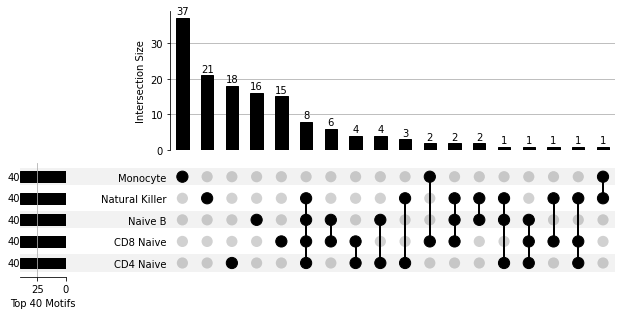

In [93]:
fig = plot(data, sort_by="cardinality", show_counts="{:,}")
fig["intersections"].set_ylabel("Intersection Size")
fig["totals"].set_xlabel("Top 40 Motifs")
plt.savefig("figures/upset.png", dpi=1000, bbox_inches='tight', facecolor= "white")  